## Практическая работа

## Цели практической работы

*  решить реальную задачу;
*  потренироваться в обработке данных;
*  обучить различные модели классификации, подобрать гиперпараметры и выбрать лучшую модель;
*  добиться наилучшего качества в задаче.

## Что входит в практическую работу

*  исследование датасета и обработка данных (работа с пропущенными и ошибочными значениями);
*  обучение различных моделей классификации с параметрами по умолчанию;
*  подбор гиперпараметров моделей;
*  смешивание моделей;
*  оценка качества моделей.

## Что оценивается

*  Выполнены все этапы задания: код запускается, отрабатывает без ошибок; подробно и обоснованно написаны текстовые выводы, где это требуется.

## Формат сдачи
Выполните предложенные задания: впишите свой код (или, если требуется, текст) в ячейки после комментариев. 

*Комментарии — это текст, который начинается с символа #. Например: # ваш код здесь.*

Сохраните изменения, используя опцию Save and Checkpoint из вкладки меню File или кнопку Save and Checkpoint на панели инструментов. Итоговый файл в формате .ipynb (файл Jupyter Notebook) загрузите в личный кабинет и отправьте на проверку.

### 1. Загрузите тренировочные и тестовые датасеты

In [1]:
import numpy as np
import pandas as pd
#from category_encoders import TargetEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from matplotlib import pyplot as plt

x_train = pd.read_csv("TrainData.csv")
x_test = pd.read_csv("TestData.csv")

Matplotlib is building the font cache; this may take a moment.


In [2]:
print(x_test.target.value_counts()[1] / x_test.target.value_counts()[0])
print(x_train.target.value_counts()[1] / x_train.target.value_counts()[0])

0.30684788290642967
0.31394533987386125


### 2. Изучите тренировочные и тестовые данные на наличие:
- пропусков,
- ошибочных значений.

Обработайте пропуски и ошибочные значения способом, выбранным по своему усмотрению.

In [18]:
# Ваш код здесь
for feature in x_train.columns:
    print(len(x_train[x_train[feature].isna() == True]),' - ', feature)

0  -  f1
0  -  f2
0  -  f3
0  -  f4
0  -  f5
0  -  f6
1875  -  f7
0  -  f8
0  -  f9
0  -  f10
10  -  f11
0  -  f12
0  -  f13
0  -  f14
0  -  target


In [4]:
# выбросы в зарплатах

def outliers(df3, feature_str):
    #print('resolution_func start')
    #outliers
    bounds = []
    q25 = df3[feature_str].quantile(0.25)
    q75 = df3[feature_str].quantile(0.75)
    iqr = q75 - q25
    bounds = (round(q25 - 1.5 * iqr, 2), round(q75 + 1.5 * iqr, 2))
#     print(bounds)
    df3[feature_str] = df3[feature_str].apply(lambda x:bounds[0] if x < bounds[0] else ( bounds[1] if x > bounds[1] else x))



    return df3

In [5]:
def empties(df3, feature_str):
    
    mean = x_train[feature_str].mean()
    x_train.loc[x_train[feature_str].isna() == True, feature_str] = mean
    
    return df3

In [6]:
def how_many_empties(df3, feature_str):
    
    print(len(x_train[df3[feature_str].isna() == True]))
    
    pass

    

In [7]:
x_train = outliers(x_train, 'f2')
x_train = empties(x_train, 'f2')

In [8]:
x_train.f7.describe()

count    5625.000000
mean        0.240556
std         0.147371
min         0.000000
25%         0.115721
50%         0.241573
75%         0.439103
max         0.482222
Name: f7, dtype: float64

In [9]:
len(x_train[x_train.f7.isna() == False])

5625

In [10]:
x_train.f7

0       0.274531
1       0.439103
2       0.274531
3       0.044987
4       0.115721
          ...   
7495         NaN
7496    0.131370
7497    0.482222
7498    0.093897
7499    0.131370
Name: f7, Length: 7500, dtype: float64

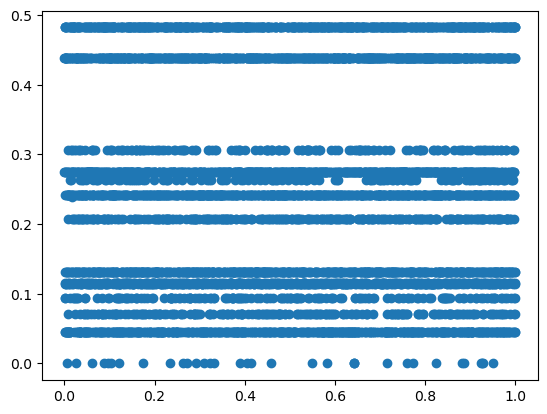

In [11]:
plt.scatter( np.arange(0, 1, 1 / 7500), x_train.f7)

# пора кончать, так что вот тебе план что делать дальше - 
1) мысль - аутлаеры - хуй пойми, что с ними делать, надо сообразить боксплот и в зависимости от того, насколько их дохуя - либо сгладить либо хуй с ними

2) мысль - пропусков чеот дохуя - можно средним заменить, но хотелось бы выебнуться - идея: сделать "срез" с существующей выборки, сампл, и наложить на отсутствующий кусок. - сразу вопрос - корректно ли так делать - можно нарушить существующие закономерности сильнее, чем если просто ебануть среднее

# все короче, пора передохнуть, удачи, будущий я:)


### 3. Оцените баланс классов в задаче
- Затем попытайтесь устно ответить на вопрос, можно ли использовать accuracy как метрику качества в задаче? 

In [12]:
# Ваш код здесь

### 3. Постройте baseline-модель:
- разбейте TrainData на тренировочные (Train) и тестовые данные (Test); 
- обучите KNN, LogisticRegression и SVC с параметрами по умолчанию на тренировочных данных (Train);
- примените модели на тестовых данных (Test) и вычислите значение метрики f1.

In [13]:
from sklearn.metrics import f1_score

# Ваш код здесь

### 4. Улучшите модели
Попробуйте улучшить качество обученных моделей:
- можете подбирать гиперпараметры моделей (лучше это делать по кросс-валидации на Train, то есть с помощью использования GridSearchCV на Train);
- можете задавать class_weights;
- можете вручную или при помощи методов Python генерировать новые признаки и/или удалять существующие.

Это самая важная и творческая часть задания. Проводите как можно больше экспериментов!

Проведите минимиум три эксперимента: для каждого типа модели минимум один эксперимент.

In [14]:
# Ваш код здесь

### 5. Оцените на отложенной выборке качество наилучшей модели
В пунктах 3 и 4 вы построили много разных моделей.

Возьмите ту, которая дала наилучшее качество на тестовых данных (Test). Примените её на отложенной выборке (TestData) и выведите на экран значение метрики f1.

In [15]:
# Ваш код здесь

### 6. Выполните хитрый трюк
Часто смешивание различных моделей даёт улучшение итогового предсказания. Попробуйте смешать две лучшие модели по формуле:
$$pred_{final} = \alpha\cdot pred_1 + (1-\alpha)\cdot pred_2$$.

Значение $\alpha$ подберите в цикле по Test-выборке. Оцените качество на отложенной выборке.

Удалось ли добиться улучшения качества?

In [16]:
# Ваш код здесь

### 7. Сделайте выводы

Запишите в отдельной ячейке текстом выводы о проделанной работе. Для этого ответьте на вопросы:
- Какие подходы вы использовали для улучшения работы baseline-моделей?
- Какого максимального качества удалось добиться на Test-данных?
- Какое при этом получилось качество на отложенной выборке? 
- Ваша модель переобучилась, недообучилась или обучилась как надо?

In [17]:
# Ваш текст здесь

Важный комментарий! В реальных задачах не следует ожидать, что машинным обучением всегда удастся решить задачу с хорошим качеством. Но использовать все имеющиеся у вас в арсенале методы для достижения наилучшего результата нужно.